## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

## Importing DataFrame

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

#### Checking The Datatype, Count and Null Values For Each Column To Get The Overview Of The Data

Insight: Some Values Of 'Orders' Column Are Missing, And All The Values Of 'Status' And 'Unnamed1' Column Are Missing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


Dropping Columns With No Values

In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

Dropping Rows Were There Are Null Values For The 'Orders' Column

In [9]:
df.dropna(inplace=True)

Changing The Datatype Of 'Amount' Column From float64 To int32, As There Is No Requirment For Decimal Numbers

In [10]:
df['Amount'] = df['Amount'].astype('int')

Verifying The Change

In [12]:
df['Amount'].dtypes

dtype('int32')

df.describe() Function Was Used, So To Get A Better General Overview Of The Data On The Basis Of Some Mathematical Parameters, Which Will Help To Better Delve Into Exploratory Data Analysis Part. 

In [13]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

#### On Gender Purchase Behaviour

Which Gender Has A Higher Number Of Orders In Total, Giving Us The Insight Into The Customer Demography

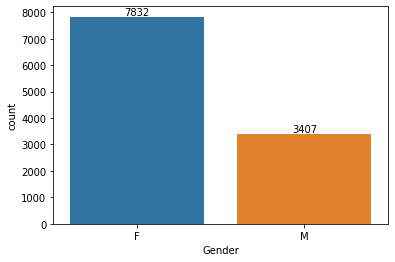

In [14]:
ax = sns.countplot(x = 'Gender',data = df) # Plotting Graph

for bars in ax.containers: # For Labels
    ax.bar_label(bars)

Which Gender Has A Higher Purchasing Power

<Axes: xlabel='Gender', ylabel='Amount'>

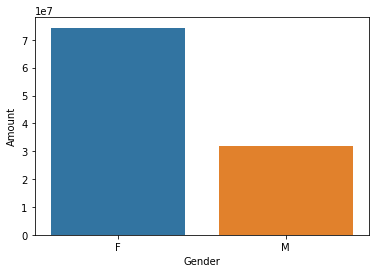

In [15]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

#### Age Purchase Behaviour

Orders Generated By Different Age Groups

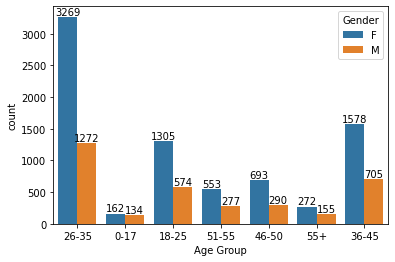

In [16]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

The Proportions Of Revenue Contribution Of Different Age Groups

<Axes: xlabel='Age Group', ylabel='Amount'>

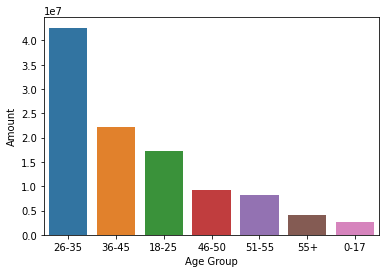

In [17]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

#### State Wise Sales

Top 10 Performing States In Terms Of Orders Generated

<Axes: xlabel='State', ylabel='Orders'>

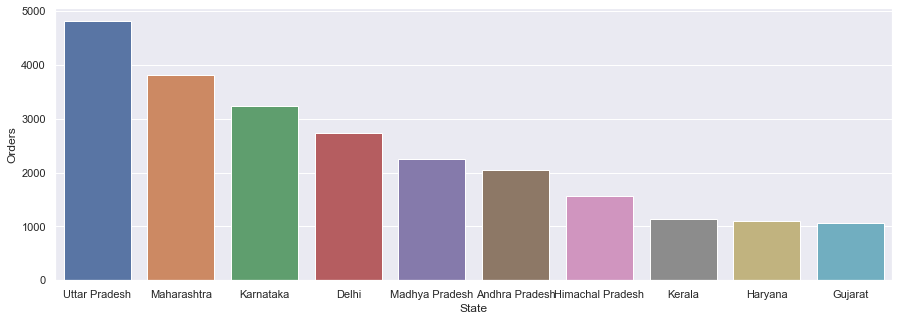

In [18]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

Their Revenue Contribution

<Axes: xlabel='State', ylabel='Amount'>

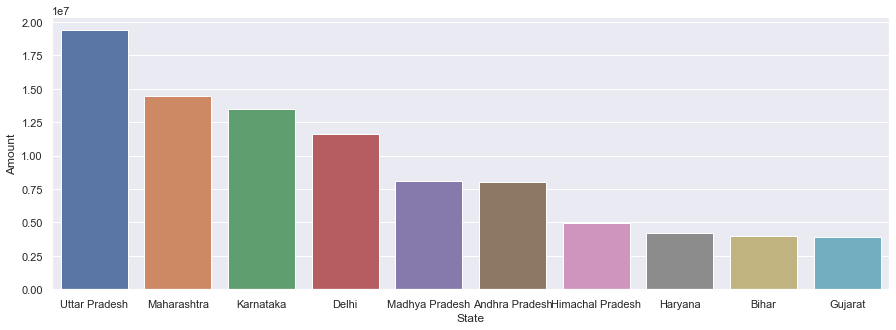

In [19]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

#### Marital Status

The Graph Below Represents The Distribution Of Orders Generated By Married Customers '0', And Single Customers Represented By '1'

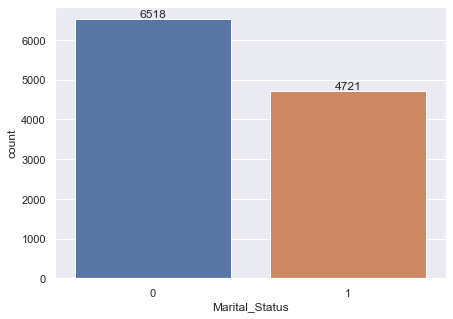

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Does The Difference Also Get Reflected On Sales Basis? Yes, It Does

<Axes: xlabel='Marital_Status', ylabel='Amount'>

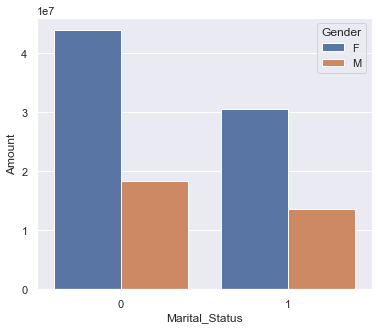

In [22]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

#### Occupation

Better Occupational Background Results In More Spending

<Axes: xlabel='Occupation', ylabel='Amount'>

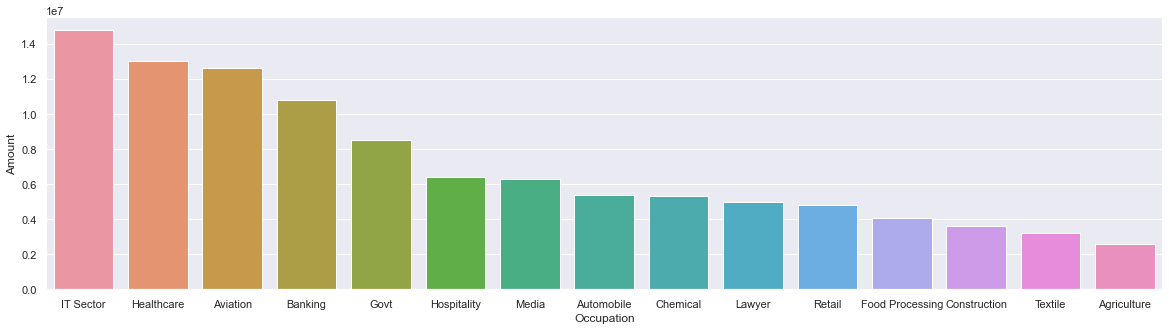

In [23]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

## Product Category

Order Count Of Different Product Categories

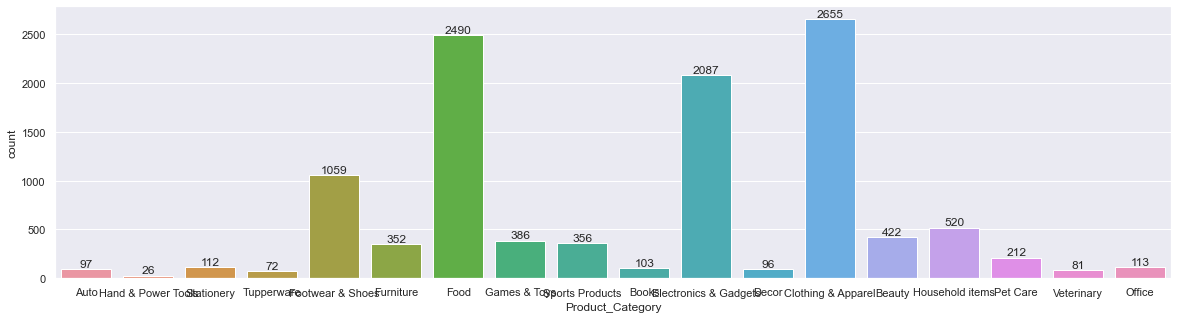

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

Sales/Revenue Of Different Product Categories

<Axes: xlabel='Product_Category', ylabel='Amount'>

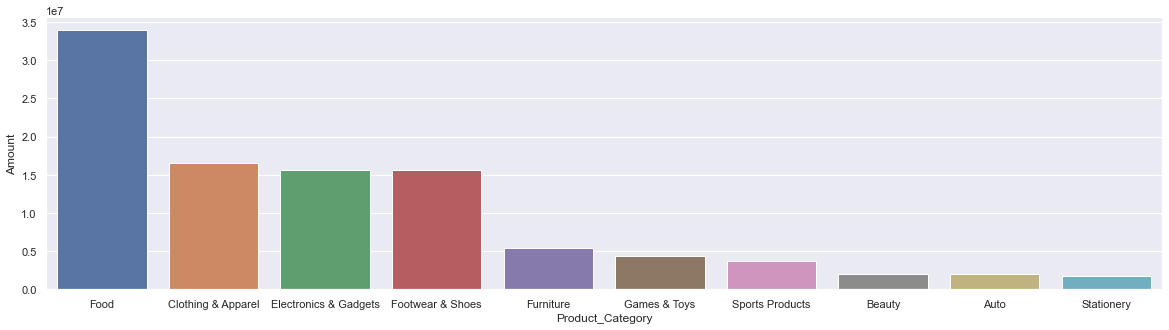

In [26]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

The Best Selling Products Are:

<Axes: xlabel='Product_ID'>

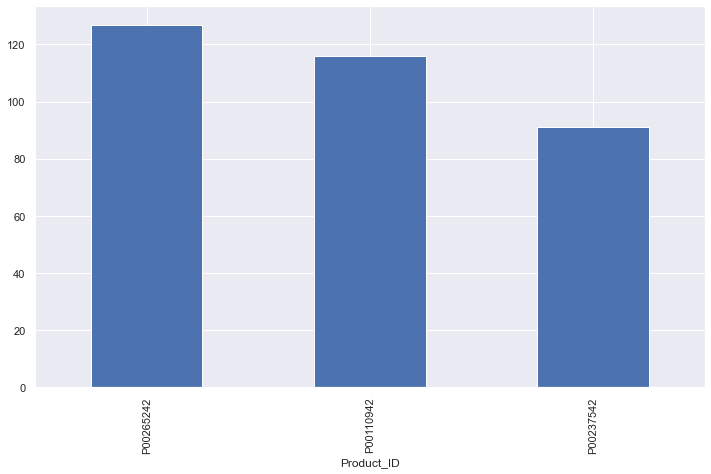

In [27]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(3).sort_values(ascending=False).plot(kind='bar')